# TIME SERIES Without imputing the missing days in the dataset.

# Start(1.In this notebook,till now--Analysis of 'Oil Investment')

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Company Stock and Investment.csv')

In [3]:
df=df[['Date','Oil Investments']]

In [4]:
df.head(35)

,Date,Oil Investments
0,31-12-2009,0.025417
1,04-01-2010,0.026830
2,05-01-2010,0.002699
3,06-01-2010,0.021688
4,07-01-2010,-0.006256
5,08-01-2010,0.001269
6,11-01-2010,-0.002417
7,12-01-2010,-0.021202
8,13-01-2010,-0.013987
9,14-01-2010,-0.003892


In [5]:
df.tail()

,Date,Oil Investments
1979,09-11-2017,0.005984
1980,10-11-2017,-0.007173
1981,13-11-2017,0.000352
1982,14-11-2017,-0.019376
1983,15-11-2017,-0.007006


In [6]:
#df.sort_index()

# Converting to datetime format

In [7]:
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df.head()

,Date,Oil Investments
0,2009-12-31,0.025417
1,2010-04-01,0.026830
2,2010-05-01,0.002699
3,2010-06-01,0.021688
4,2010-07-01,-0.006256


In [9]:
df.tail()

,Date,Oil Investments
1979,2017-09-11,0.005984
1980,2017-10-11,-0.007173
1981,2017-11-13,0.000352
1982,2017-11-14,-0.019376
1983,2017-11-15,-0.007006


# Setting the 'Date' feature as index

In [10]:
df_oil=df

In [11]:
df_oil.set_index('Date',inplace=True)

In [12]:
df_oil.head()

,Oil Investments
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256


In [13]:
df_oil.head()

,Oil Investments
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256


# Analysis Start(A,B,C)

# A)Checking for white noise

In [14]:
df_oil.index.nunique() 

1984

# All unique values ,  i.e  No white noise in data(No duplicate index).
# We can proceed with time series analysis.

In [15]:
df_oil.shape

(1984, 1)

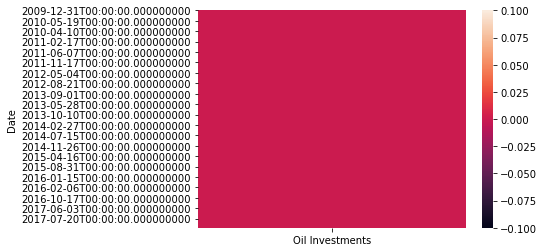

In [16]:
import seaborn as sns
sns.heatmap(df_oil.isnull())

# CREATING TRAIN,VALIDATION AND TESTING DATASET

In [17]:
df_oil_train=df_oil['2009-12-31':'2013-12-31']#2009(just 1 data),2010,2011,2012,2013 end  = 5years span

In [18]:
df_oil_train.tail()

,Oil Investments
Date,
2013-12-24,0.002535
2013-12-26,0.003135
2013-12-27,0.007663
2013-12-30,-0.010406
2013-12-31,-0.007381


In [19]:
df_oil_val=df_oil['2014-1-1':'2016-12-31']# 2years

In [20]:
df_oil_val.tail()

,Oil Investments
Date,
2016-12-23,0.000577
2016-12-27,0.015574
2016-12-28,0.022529
2016-12-29,-0.003888
2016-12-30,-0.000929


In [21]:
df_oil_test=df_oil['2016-12-31':'2017-11-15'] # 1year

In [22]:
df_oil_test.tail()

,Oil Investments
Date,
2017-09-11,0.005984
2017-10-11,-0.007173
2017-11-13,0.000352
2017-11-14,-0.019376
2017-11-15,-0.007006


## Step 2: Visualize the Data

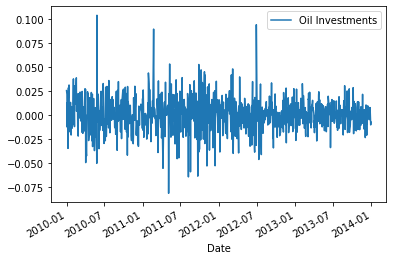

In [23]:
df_oil_train.plot()

# B)Selecting the model after visualization above

###### In above plot data looks non-seasonal /  irregular .

   Usually in seasonal data we use SARIMAX.
           in irregular(non-seasonal) we use ARIMAX.
           
   Here we will implement ARIMAX as our data looks non-seasonal /  irregular.
   Before that,Now

###### we will check if data is STATIONARY or not.

# df_oil--> we will implement ARIMAX as our data looks non-seasonal / irregular

# C)Testing For Stationarity

In [24]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [25]:
test_result=adfuller(df_oil_train['Oil Investments']) # adfuller give us 5 values

In [26]:
  # just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-31.81438921053016, 0.0, 0, 1006, {'1%': -3.436866962597422, '5%': -2.864417284603703, '10%': -2.5683020002450507}, -5166.182745446634)


### Most important value is p-value above(2nd value(0.0))

# Ho(null hypothesis): time series is non-stationary          
# H1(altenative): time series is stationary

# Step-1.Rolling/Addfuller

In [27]:
#Ho: It is non stationary
#H1: It is stationary
#considered 0.05 in general.

def adfuller_test(sales):
    result=adfuller(sales) 
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), Hence reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [28]:
adfuller_test(df_oil_train['Oil Investments']) #call the function

ADF Test Statistic : -31.81438921053016
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1006
strong evidence against the null hypothesis(Ho), Hence reject the null hypothesis. Data  is stationary


## Auto Regressive Model(AR)--Just for visualization
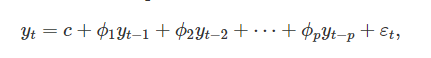

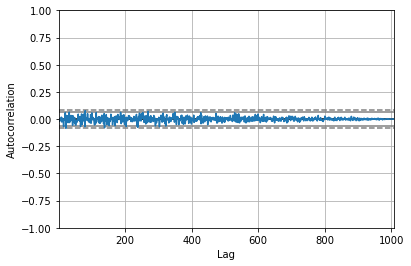

In [29]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_oil_train['Oil Investments']) 
plt.show()

# Plotting ACF(Autocorrelation) & PACF(Partial Autocorrelation)

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

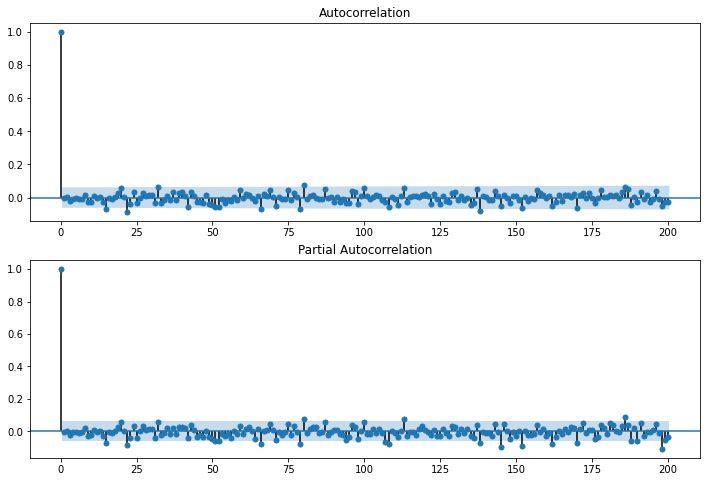

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(df_oil_train['Oil Investments'],lags=200,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_oil_train['Oil Investments'],lags=200,ax=ax2)

# D)Model Building-->Arima model Implementation

In [32]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima_model import ARIMA

# Training the model(df_oil)

# Converting date/time index to period[D] as our data is in days.

In [33]:
df_oil_train.index = pd.DatetimeIndex(df_oil_train.index).to_period('D')
                         #changing the dataframe index to period in days
    #this is done to silence the warning of feeding a datetime format in the index

In [34]:
model=ARIMA(df_oil_train['Oil Investments'],order=(1,1,1)) # this order is p d q(0 or 1) 
results=model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [35]:
#This above Warning is making the model forecast all the values as constant.

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Oil Investments   No. Observations:                 1006
Model:                 ARIMA(1, 1, 1)   Log Likelihood                2640.093
Method:                       css-mle   S.D. of innovations              0.017
Date:                Tue, 20 Oct 2020   AIC                          -5272.186
Time:                        16:01:40   BIC                          -5252.531
Sample:                             1   HQIC                         -5264.718
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -7.302e-07   1.89e-06     -0.386      0.699   -4.44e-06    2.98e-06
ar.L1.D.Oil Investments    -0.0024      0.032     -0.075      0.940      -0.064       0.060
ma.L1.D.Oil Investments    -1.0000      0.003   -383.838      0.000      -1.005      -0.995
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1         -423.8953           +0.0000j          423.8953            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [37]:
results.forecast(10) #interpretation??

(array([5.47857329e-05, 3.65118119e-05, 3.58230190e-05, 3.50927414e-05,
        3.43625617e-05, 3.36323818e-05, 3.29022019e-05, 3.21720220e-05,
        3.14418420e-05, 3.07116621e-05]),
 array([0.01747997, 0.01748001, 0.01748001, 0.01748001, 0.01748001,
        0.01748001, 0.01748001, 0.01748001, 0.01748001, 0.01748001]),
 array([[-0.03420532,  0.03431489],
        [-0.03422369,  0.03429671],
        [-0.03422437,  0.03429602],
        [-0.0342251 ,  0.03429529],
        [-0.03422583,  0.03429456],
        [-0.03422656,  0.03429383],
        [-0.03422729,  0.0342931 ],
        [-0.03422803,  0.03429237],
        [-0.03422876,  0.03429164],
        [-0.03422949,  0.03429091]]))

# Testing accuracy on training set

In [38]:
df_oil_train['2012-01-02':'2013-12-31']

,Oil Investments
Date,
2012-01-02,-0.008430
2012-02-02,-0.013008
2012-03-02,0.014944
2012-06-02,-0.009305
2012-07-02,0.017133
...,...
2013-12-24,0.002535
2013-12-26,0.003135
2013-12-27,0.007663


<ipython-input-39-66ac46dde673>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oil_train['forecast']=results.predict(start='2012-01-02',end='2013-12-31',dynamic=True)


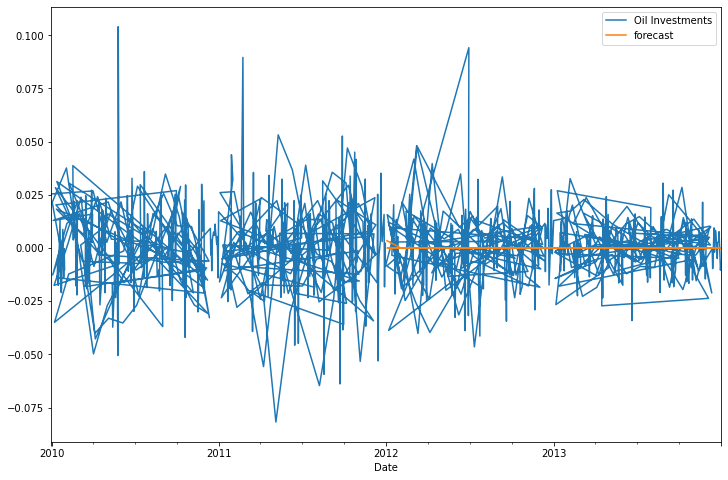

In [39]:
df_oil_train['forecast']=results.predict(start='2012-01-02',end='2013-12-31',dynamic=True)
df_oil_train[['Oil Investments','forecast']].plot(figsize=(12,8))

In [40]:
### In Above fig.The orange line is not overlapping on the blue line path,i.e model accuracy is not good.


In [41]:
#Model is predicting all values are constant
#this is because of the warning while fitting the data.
#ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

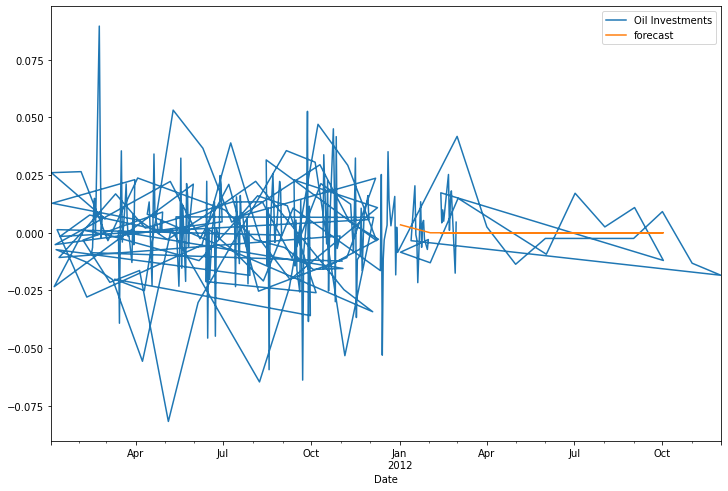

In [42]:
df_oil_train[['Oil Investments','forecast']]['2011-11-02':'2012-02-29'].plot(figsize=(12,8))


In [43]:
df_oil_train['2012-01-02':'2013-12-31']

,Oil Investments,forecast
Date,,
2012-01-02,-0.008430,3.436467e-03
2012-02-02,-0.013008,-8.838780e-06
2012-03-02,0.014944,-7.110511e-07
2012-06-02,-0.009305,-7.302250e-07
2012-07-02,0.017133,-7.301798e-07
...,...,...
2013-12-24,0.002535,-7.301799e-07
2013-12-26,0.003135,-7.301799e-07
2013-12-27,0.007663,-7.301799e-07


In [44]:
#We can see except a few point all other points are same,constant(-7.301799e-07)
#Spike seen in the data is due to the points in satrt(2012-01-02	-0.008430	3.436467e-03  |  2012-02-02	-0.013008	-8.838780e-06)

In [ ]:
#Model is predicting so bad on training set itself that i am not proceeding with validation and testing set.